<font size=6>**Linear Regression**</font>
___

In [19]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns
from scipy import stats
import yfinance

sns.set_theme()
rng = np.random.default_rng(seed=2025)

# Simulated dataset  

The endogenous variable $y$ is a quadratic function of the exogenous variable $X$ with some Gaussian noise.

Import the class for Ordinary Least Squares linear regression: [`statsmodels.regression.linear_model.OLS`](https://www.statsmodels.org/dev/generated/statsmodels.regression.linear_model.OLS.html).

Import a tool which add a column of ones for the constant: [`statsmodels.tools.tools.add_constant`](https://www.statsmodels.org/dev/generated/statsmodels.tools.tools.add_constant.html)

In [20]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: seaborn in c:\users\quent\appdata\local\packages\pythonsoftwarefoundation.python.3.11_qbz5n2kfra8p0\localcache\local-packages\python311\site-packages (0.13.2)




[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: C:\Users\quent\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [21]:
from statsmodels.regression.linear_model import OLS
from statsmodels.tools.tools import add_constant

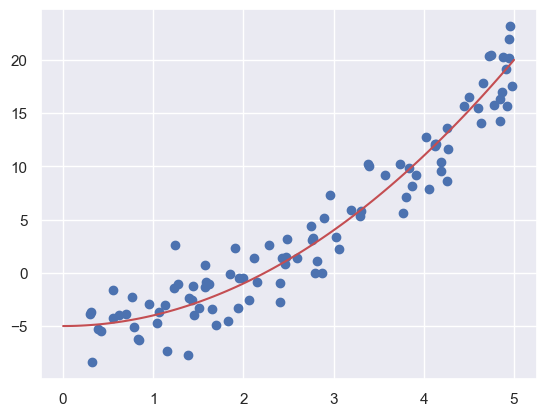

In [22]:
def f(x):
    return x**2 - 5

def create_dataset(size = 100):
    X = stats.uniform(0,5).rvs(size=size, random_state=rng)
    error = stats.norm.rvs(size=size, scale=2, random_state=rng)
    y = f(X) + error
    # plot the dataset
    fig, ax = plt.subplots()
    x = np.linspace(0, 5, 100)
    ax.plot(x, f(x), 'r')
    ax.scatter(X, y)
    # put the data in DataFrames before returning the values
    X = pd.DataFrame(data={'X': X})
    X = add_constant(X) # add a column of ones for the constant term
    y = pd.DataFrame(data={'y': y})
    return X, y

X, y = create_dataset()

## Test a simple linear regression

Build and fit a model. Print and interpret the results.

In [23]:
model1 = OLS(y, X)
fitted_model1 = model1.fit()
print(fitted_model1.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.888
Model:                            OLS   Adj. R-squared:                  0.887
Method:                 Least Squares   F-statistic:                     776.0
Date:                Wed, 26 Mar 2025   Prob (F-statistic):           2.33e-48
Time:                        12:55:46   Log-Likelihood:                -243.22
No. Observations:                 100   AIC:                             490.4
Df Residuals:                      98   BIC:                             495.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -10.0214      0.589    -17.021      0.0

Plot the regression line using the [`OLS.predict()`](statsmodels.regression.linear_model.OLS.predict) method.

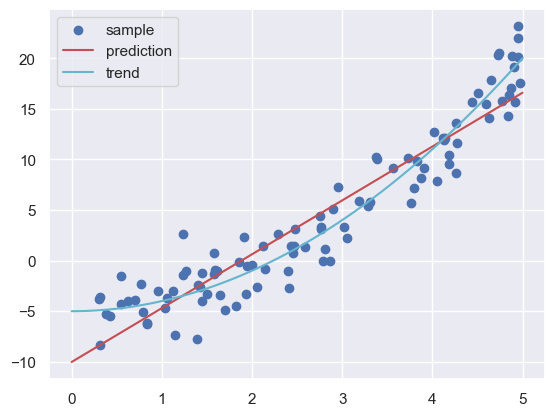

In [24]:
def plot_simple_linear_reg(X, y, reg_res):
    x = np.linspace(0, 5, 100)
    x_exog = add_constant(x)
    pred = reg_res.predict(x_exog)
    fig, ax = plt.subplots()
    ax.scatter(X['X'], y, label="sample")
    ax.plot(x, pred, 'r', label="prediction")
    ax.plot(x, f(x), 'c', label="trend")
    ax.legend()

plot_simple_linear_reg(X, y, fitted_model1)

Plot the residuals vs the exogenous variable. What do you conclude ?

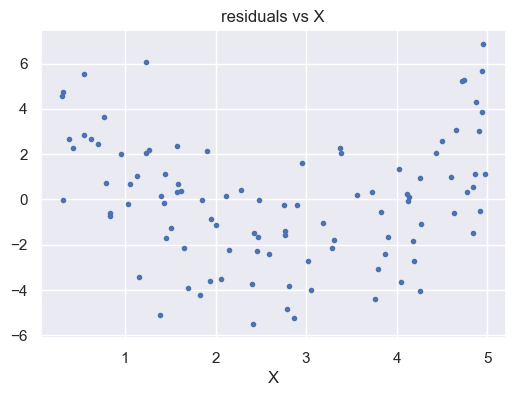

In [25]:
def plot_residuals_vs_exogenous(X, residuals):
    exog_names = X.columns[1:]
    n_exog = len(exog_names)
    if n_exog == 1:
        name = exog_names[0]
        fig, ax = plt.subplots(figsize=(6, 4))
        ax.scatter(X[name], residuals, marker='.')
        ax.set_xlabel(name)
        ax.set_title("residuals vs " + name)
    elif n_exog > 1:
        fig, axs = plt.subplots(1, n_exog, figsize=(5*n_exog, 4))
        for ax, name in zip(axs, exog_names):
            ax.scatter(X[name], residuals, marker='.')
            ax.set_xlabel(name)
            ax.set_title("residuals vs " + name)

plot_residuals_vs_exogenous(X, fitted_model1.resid)


In [26]:
# With the above graph we test 2 things (Expectation of Xe = 0 & Cov(X, e) = 0, nd since the scatters are convex then there is some Cov, so we need a better model)

## Test a polynomial regression  

$$Y = \beta_0 + \beta_1 X + \beta_2 X^2 + \varepsilon$$

Add the additional regressor $X^2$

In [27]:
X['X squared'] = X['X'] ** 2
X.head()

,const,X,X squared
0,1.0,4.972289,24.723658
1,1.0,1.910049,3.648286
2,1.0,4.135740,17.104346
3,1.0,4.186276,17.524910
4,1.0,4.879045,23.805081


Fit the new model and interpret the results.

In [28]:
model2 = OLS(y, X)
fitted_model2 = model2.fit()
print(fitted_model2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.931
Method:                 Least Squares   F-statistic:                     668.7
Date:                Wed, 26 Mar 2025   Prob (F-statistic):           1.82e-57
Time:                        12:55:47   Log-Likelihood:                -217.93
No. Observations:                 100   AIC:                             441.9
Df Residuals:                      97   BIC:                             449.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -4.7146      0.808     -5.837      0.0

Plot the regression

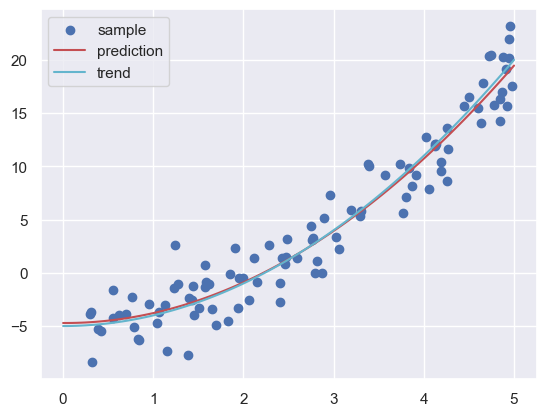

In [29]:
def plot_polynomial_reg(X, y, reg_res):
    x = np.linspace(0, 5, 100)
    x_exog = np.vstack([x, x**2]).T
    x_exog = add_constant(x_exog)
    pred = reg_res.predict(x_exog)
    fig, ax = plt.subplots()
    ax.scatter(X['X'], y, label="sample")
    ax.plot(x, pred, 'r', label="prediction")
    ax.plot(x, f(x), 'c', label="trend")
    ax.legend()

plot_polynomial_reg(X, y, fitted_model2)

Plot the residuals vs the exogenous variables.

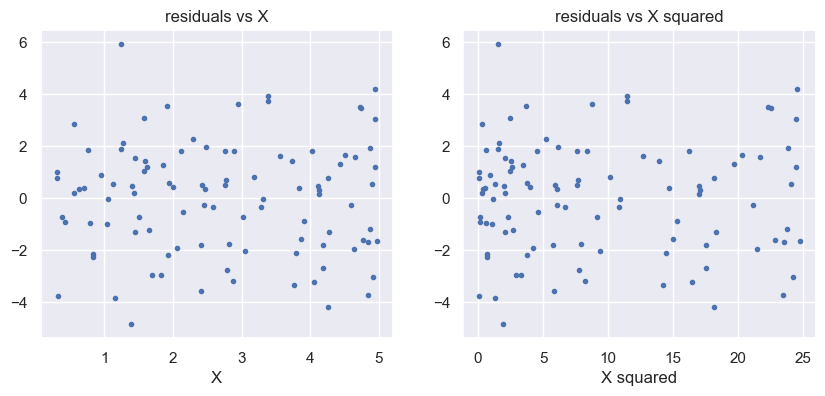

In [30]:
plot_residuals_vs_exogenous(X, fitted_model2.resid)

In [31]:
# With the above graphs we can say that there is not Cov this time, so it's good for the model.

Draw a Normal Probability Plot of the residuals to test if the estimated residuals are consistent with the assumption that they are Normally distributed

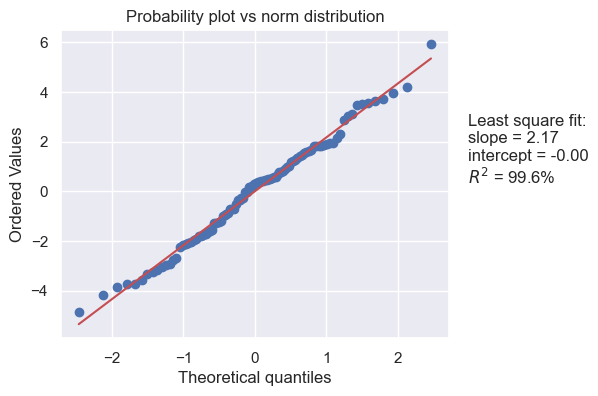

In [55]:
def probplot_residuals(residuals, dist='norm', dist_params={}):
    fig, ax = plt.subplots(figsize=(5,4))
    plot = stats.probplot(residuals, dist=dist, sparams=dist_params, plot=ax)
    slope, intercept, r = plot[1]
    label = "Least square fit:\n"
    label += f"slope = {slope:.2f}\n"
    label += f"intercept = {intercept:.2f}\n"
    label += f"$R^2$ = {r:.1%}"
    ax.text(1.05, 0.5, label, transform=ax.transAxes)
    ax.set_title(f"Probability plot vs {dist} distribution")

plot = probplot_residuals(fitted_model2.resid)

# Prediction of future realized volatility  

Is the VIX index a good predictor of next month future realized volatility?  
Is it a better predictor than the past month realized volatility?  
Is it possible to improve the prediction by adding additional regressors?  

VIX index: [CBOE FAQ](https://www.cboe.com/tradable_products/vix/faqs/?_gl=1*90kj1t*_up*MQ..*_ga*NTg4NDUwMzUyLjE3NDI3MjI4NDU.*_ga_5Q99WB9X71*MTc0MjcyMjg0My4xLjAuMTc0MjcyMjg0NC4wLjAuMA..), [Wikipedia](https://en.wikipedia.org/wiki/VIX)  
SKEW index: [CBOE Insight](https://www.cboe.com/insights/posts/dawn-of-a-new-era-brings-on-the-existence-of-skew/), [Seeking Alpha](https://seekingalpha.com/article/3467846-is-the-skew-index-predictive-for-the-s-and-p-500)

## Load and prepare the data

In [56]:
tickers_list = '^GSPC ^VIX ^SKEW'
tickers_to_names = {'^GSPC': 'SP500',  # S&P 500 Index
                    '^VIX': 'VIX',     # CBOE Volatility Index
                    '^SKEW': 'SKEW',   # CBOE Skew Index
                   }
download = yfinance.download(tickers=tickers_list,
                         start='2021-01-01',
                         end='2025-02-28',
                         interval='1d',
                         group_by='column'
                         )

[*********************100%***********************]  3 of 3 completed


In [57]:
data = download['Close'].copy()
data.rename(columns=tickers_to_names, inplace=True)
display(data.head().round(2))
display(data.info())

Ticker,SP500,SKEW,VIX
Date,,,
2021-01-04,3700.65,147.83,26.97
2021-01-05,3726.86,143.84,25.34
2021-01-06,3748.14,145.50,25.07
2021-01-07,3803.79,147.06,22.37
2021-01-08,3824.68,145.92,21.56


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1043 entries, 2021-01-04 to 2025-02-27
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   SP500   1043 non-null   float64
 1   SKEW    962 non-null    float64
 2   VIX     1043 non-null   float64
dtypes: float64(3)
memory usage: 32.6 KB


None

Some data is missing for `SKEW`

In [58]:
data.dropna(inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 962 entries, 2021-01-04 to 2025-02-27
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   SP500   962 non-null    float64
 1   SKEW    962 non-null    float64
 2   VIX     962 non-null    float64
dtypes: float64(3)
memory usage: 30.1 KB


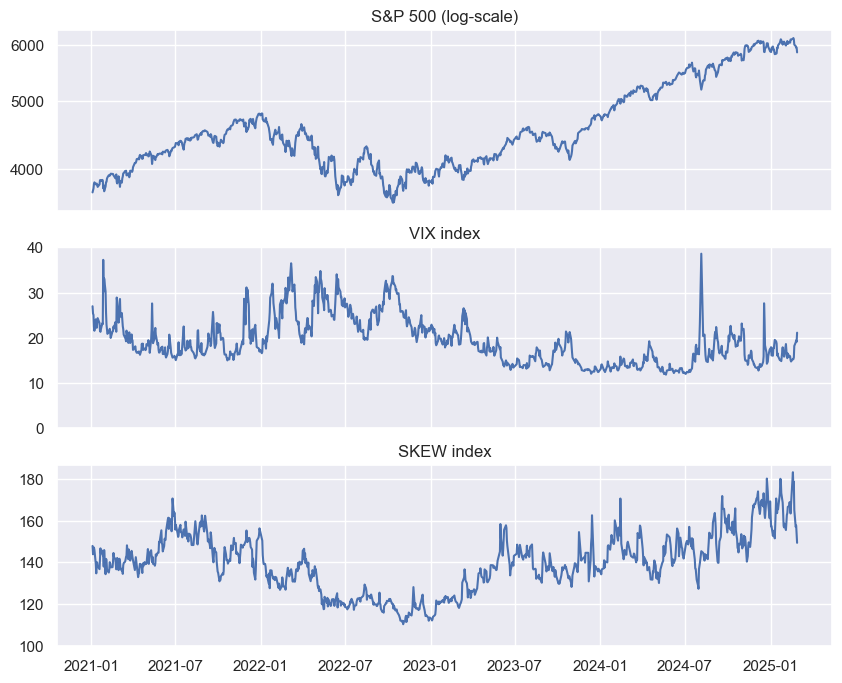

In [59]:
def plot_vix_skew(df):
    fig, (ax_sp, ax_vix, ax_skew) = plt.subplots(3, figsize=(10,8), sharex=True)
    ax_sp.semilogy(df['SP500'])
    price_ticks = 1e3 * np.array([4, 5, 6])
    price_tick_labels = ['4000', '5000', '6000']
    ax_sp.set_yticks(ticks=price_ticks)
    ax_sp.set_yticklabels(price_tick_labels)
    ax_sp.set_title("S&P 500 (log-scale)")

    ax_vix.plot(df['VIX'])
    ax_vix.set_ylim(0,40)
    ax_vix.set_title("VIX index")

    ax_skew.plot(df['SKEW'])
    ax_skew.set_ylim(bottom=100)
    ax_skew.set_title("SKEW index")

plot_vix_skew(data)

## Construct the exogenous and endogenous variables

We want a forward-looking rolling window. To obtain this, we need [`pandas.api.indexers.FixedForwardWindowIndexer`](https://pandas.pydata.org/docs/reference/api/pandas.api.indexers.FixedForwardWindowIndexer.html)

In [60]:
indexer = pd.api.indexers.FixedForwardWindowIndexer(window_size=3)
a  = pd.DataFrame(data={'value': np.arange(10)})
a['forward rolling mean'] = a['value'].rolling(window=indexer).sum()
a

,value,forward rolling mean
0,0,3.0
1,1,6.0
2,2,9.0
3,3,12.0
4,4,15.0
5,5,18.0
6,6,21.0
7,7,24.0
8,8,NaN
9,9,NaN


In [61]:
PAST_WINDOW_SIZES = [5, 10, 20, 30]
FUTURE_WINDOW_SIZE = 20

# compute 1 day and PAST_WINDOW_SIZES days % changes
data['SP500_daily_chg'] = 100 * data['SP500'].pct_change()
for s in PAST_WINDOW_SIZES:
    data[f'SP500_chg{s}'] = 100 * data['SP500'].pct_change(s)
    # compute past realized volatility of daily returns
    data[f'vol_realized{s}'] = math.sqrt(260) * data['SP500_daily_chg'].rolling(s).std()

# compute future realized volatility of daily returns
indexer = pd.api.indexers.FixedForwardWindowIndexer(window_size=FUTURE_WINDOW_SIZE)
data['vol_next'] = math.sqrt(260) * data['SP500_daily_chg'].rolling(window=indexer, min_periods=20).std()

# remove daily returns
data.drop(columns='SP500_daily_chg', inplace=True)

# remove rows with NaN values
data.dropna(inplace=True)
data = data.reindex(sorted(data.columns), axis=1)
data.tail()

Ticker,SKEW,SP500,SP500_chg10,SP500_chg20,SP500_chg30,SP500_chg5,VIX,vol_next,vol_realized10,vol_realized20,vol_realized30,vol_realized5
Date,,,,,,,,,,,,
2025-01-24,173.160004,6101.240234,3.091965,2.128706,0.799460,2.760502,14.850000,12.144680,14.587804,14.352362,15.564900,8.106348
2025-01-27,168.550003,6012.279785,3.178968,-0.459604,-0.374991,0.260472,17.900000,12.216318,14.286452,14.884783,16.148776,15.339246
2025-01-28,163.639999,6067.700195,3.966265,0.498715,-0.271026,0.305162,16.410000,11.182247,14.568766,15.265251,16.199808,15.498306
2025-01-29,157.429993,6039.310059,3.361337,1.146743,-0.197314,-0.773204,16.559999,10.570063,15.180700,14.782112,16.179383,14.960688
2025-01-30,156.699997,6071.169922,2.038010,2.780289,0.331842,-0.776962,15.840000,11.812571,12.725834,14.220808,16.254216,14.949411


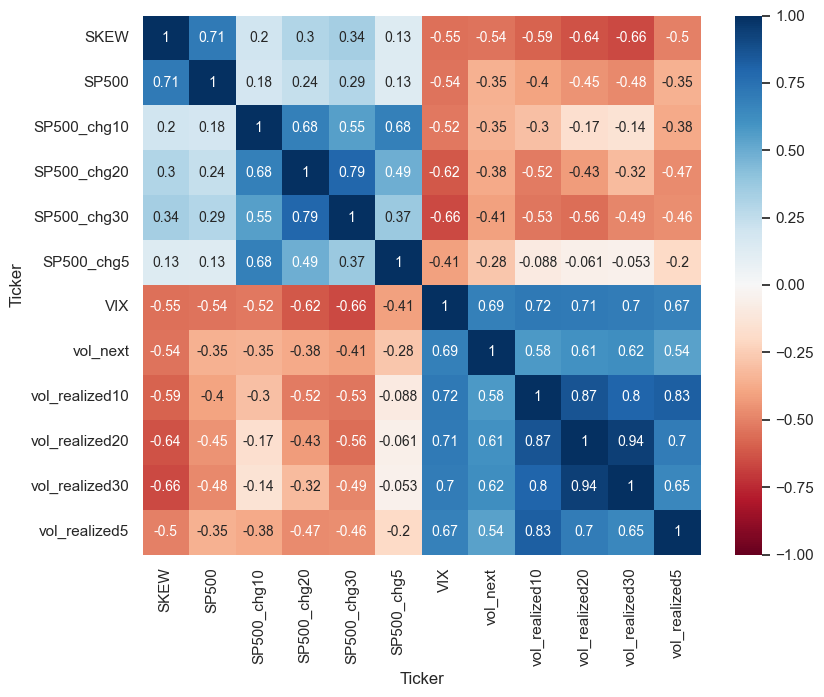

In [62]:
corr = data.corr()
fig, ax = plt.subplots(figsize=(9,7))
ax = sns.heatmap(corr, cmap='RdBu', vmin=-1, annot=True, annot_kws={'size': 10}, ax=ax)

Check for collinearity using [`statsmodels.stats.outliers_influence.variance_inflation_factor`](https://www.statsmodels.org/stable/generated/statsmodels.stats.outliers_influence.variance_inflation_factor.html#statsmodels.stats.outliers_influence.variance_inflation_factor)

In [63]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def compute_VIF(data, exog_labels):
    n_labels = len(exog_labels)
    if n_labels > 1:
        exog = add_constant(data[exog_labels])
        df_VIF = pd.DataFrame(
            data={'VIF':[variance_inflation_factor(exog, i+1) for i in range(n_labels)]},
            index=exog_labels
            )
        display(df_VIF)        
    else:
        df_VIF = pd.DataFrame()
    
    return df_VIF

exog_names = data.columns.to_list()
df_VIF = compute_VIF(data=data, exog_labels=exog_names)

,VIF
SKEW,3.116920
SP500,2.459055
SP500_chg10,3.078045
SP500_chg20,4.353818
SP500_chg30,3.539383
SP500_chg5,2.154195
VIX,5.002920
vol_next,2.267367
vol_realized10,7.554216
vol_realized20,13.751915


## Build a model

In [64]:
def apply_regression(data, endog_labels, exog_labels):
    endog = data[endog_labels]
    exog = add_constant(data[exog_labels])
    model = OLS(endog=endog, exog=exog)
    fitted_model = model.fit()
    print(fitted_model.summary())
    return fitted_model

### Is VIX a good predictor of future realized volatility?

In [65]:
endog_name = ['vol_next']
exog_names = ['VIX']
mod = apply_regression(data=data, endog_labels=endog_name, exog_labels=exog_names)

                            OLS Regression Results                            
Dep. Variable:               vol_next   R-squared:                       0.469
Model:                            OLS   Adj. R-squared:                  0.469
Method:                 Least Squares   F-statistic:                     805.6
Date:                Wed, 26 Mar 2025   Prob (F-statistic):          1.79e-127
Time:                        12:59:09   Log-Likelihood:                -2690.6
No. Observations:                 913   AIC:                             5385.
Df Residuals:                     911   BIC:                             5395.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1624      0.590      0.275      0.7

### Is past realized volatility a good predictor of future realized volatility?

In [66]:
endog_name = ['vol_next']
exog_names = ['vol_realized20']
mod = apply_regression(data=data, endog_labels=endog_name, exog_labels=exog_names)

                            OLS Regression Results                            
Dep. Variable:               vol_next   R-squared:                       0.368
Model:                            OLS   Adj. R-squared:                  0.368
Method:                 Least Squares   F-statistic:                     531.0
Date:                Wed, 26 Mar 2025   Prob (F-statistic):           6.23e-93
Time:                        13:07:23   Log-Likelihood:                -2770.2
No. Observations:                 913   AIC:                             5544.
Df Residuals:                     911   BIC:                             5554.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              6.3271      0.466     13.

### Best subset model selection

#### Compute all possible models with all possible subsets of the exogenous variables.  

We need to use the [`itertools`](https://docs.python.org/3/library/itertools.html) package.

In [67]:
from itertools import combinations

l = ['a', 'b', 'c', 'd', 'e']
for selection in combinations(l, 3):
    print(selection)

('a', 'b', 'c')
('a', 'b', 'd')
('a', 'b', 'e')
('a', 'c', 'd')
('a', 'c', 'e')
('a', 'd', 'e')
('b', 'c', 'd')
('b', 'c', 'e')
('b', 'd', 'e')
('c', 'd', 'e')


In [68]:
def fit_all_models(data, endog_labels, exog_labels):
    endog = data[endog_labels]
    n_exog = len(exog_labels)
    results = []

    for i in range(n_exog):
        for names in combinations(exog_labels, i+1):
            exog = add_constant(data[list(names)])
            model = OLS(endog, exog)
            fitted_model = model.fit()
            results.append([
                i+1,
                names,
                fitted_model.rsquared_adj,
                fitted_model.aic,
                fitted_model.bic
                ])
    df_models = pd.DataFrame(data = results, columns=['size', 'regressors', 'adjusted R2', 'AIC', 'BIC'])
    return df_models


In [69]:
endog_name = ['vol_next']
exog_names = data.columns.to_list()
exog_names.remove('vol_next')

df = fit_all_models(data, endog_name, exog_names)
df.tail()

,size,regressors,adjusted R2,AIC,BIC
2042,10,"(SKEW, SP500, SP500_chg10, SP500_chg30, SP500_...",0.553889,5234.636070,5287.620165
2043,10,"(SKEW, SP500, SP500_chg20, SP500_chg30, SP500_...",0.551570,5239.370089,5292.354183
2044,10,"(SKEW, SP500_chg10, SP500_chg20, SP500_chg30, ...",0.532664,5277.074186,5330.058281
2045,10,"(SP500, SP500_chg10, SP500_chg20, SP500_chg30,...",0.525939,5290.117782,5343.101877
2046,11,"(SKEW, SP500, SP500_chg10, SP500_chg20, SP500_...",0.553575,5236.265614,5294.066444


#### Find the best model for each size of the predictors' set and each criteria

In [70]:
def selected_models(df_models):
    selected = []
    for s in range(df_models['size'].max()):
        mask = df_models['size'] == s+1
        df_mask = df.loc[mask]
        idx_r = df_mask['adjusted R2'].idxmax()
        idx_aic = df_mask['AIC'].idxmin()
        idx_bic = df_mask['BIC'].idxmin()
        selected.append([s, idx_r, idx_aic, idx_bic])
    return pd.DataFrame(data=selected, columns=['size', 'adjusted R2', 'AIC', 'BIC'])

df_selected_idx = selected_models(df)
df_selected_idx

,size,adjusted R2,AIC,BIC
0,0,6,6,6
1,1,58,58,58
2,2,70,70,70
3,3,259,259,259
4,4,617,617,617
5,5,1051,1051,1051
6,6,1531,1531,1531
7,7,1862,1862,1862
8,8,2003,2003,2003
9,9,2042,2042,2042


#### Plot the results

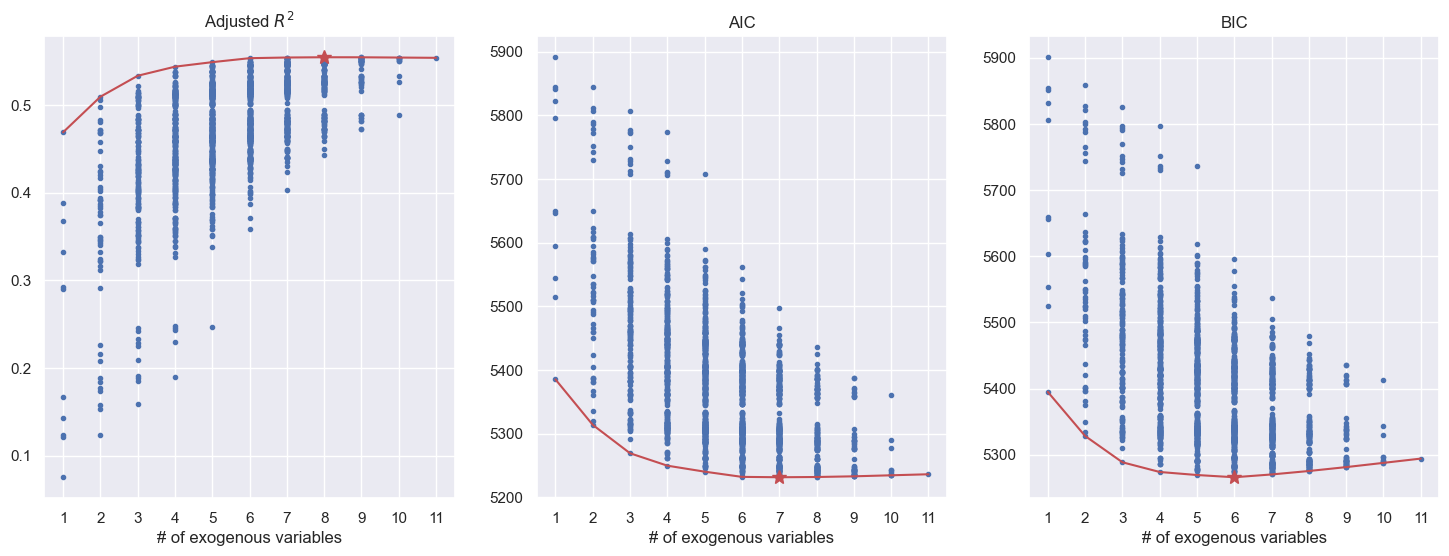

In [71]:
def plot_results(df_models, df_idx, min_r2=0):
    titles = ['Adjusted $R^2$', 'AIC', 'BIC']
    col_names = ['adjusted R2', 'AIC', 'BIC']
    mask = df_models['adjusted R2'] >= min_r2
    df_masked = df_models[mask]
    fig, axs = plt.subplots(1, 3, figsize=(18, 6))
    for ax, title, name in zip(axs, titles, col_names):
        ax.scatter(df_masked['size'], df_masked[name], marker='.')
        ax.set_xticks(np.arange(1, 12))
        ax.set_xlabel("# of exogenous variables")
        ax.set_title(title)
    best_r = df_models.loc[df_idx['adjusted R2'],['size','adjusted R2']]
    best_aic = df_models.loc[df_idx['AIC'],['size','AIC']]
    best_bic = df_models.loc[df_idx['BIC'],['size','BIC']]
    for ax, d, name in zip(axs, [best_r, best_aic, best_bic], col_names):
        ax.plot(d['size'], d[name], 'r')
    selected_r = df_models.iloc[best_r['adjusted R2'].idxmax()]
    selected_aic = df_models.iloc[best_aic['AIC'].idxmin()]
    selected_bic = df_models.iloc[best_bic['BIC'].idxmin()]
    for ax, d, name in zip(axs, [selected_r, selected_aic, selected_bic], col_names):
        ax.plot(d['size'], d[name], marker='*', color='r', markersize=10)

plot_results(df, df_selected_idx)

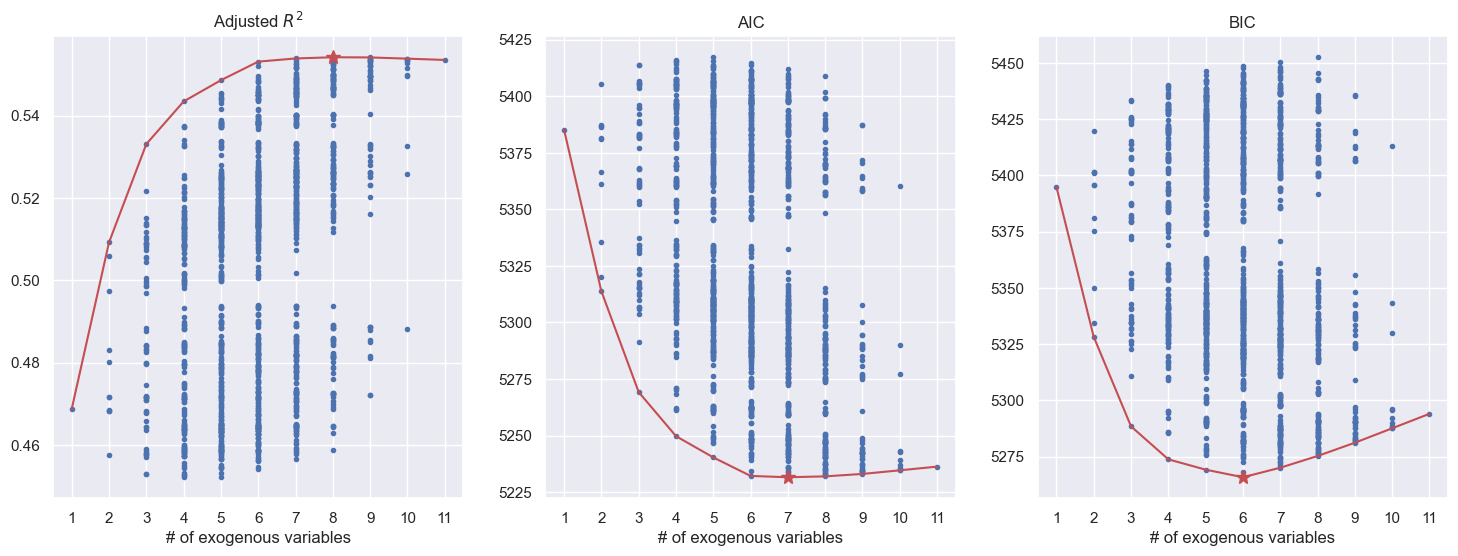

In [72]:
plot_results(df, df_selected_idx, min_r2=0.45)

### Study the selected model

In [73]:
idx_best_bic = df.loc[df_selected_idx['BIC'],'BIC'].idxmin()
exog_names = list(df.loc[idx_best_bic, 'regressors'])
exog_names

['SKEW', 'SP500', 'SP500_chg10', 'SP500_chg30', 'VIX', 'vol_realized30']

In [74]:
selected_mod = apply_regression(data=data, endog_labels=endog_name, exog_labels=exog_names)

                            OLS Regression Results                            
Dep. Variable:               vol_next   R-squared:                       0.556
Model:                            OLS   Adj. R-squared:                  0.553
Method:                 Least Squares   F-statistic:                     189.2
Date:                Wed, 26 Mar 2025   Prob (F-statistic):          5.29e-156
Time:                        13:21:01   Log-Likelihood:                -2609.1
No. Observations:                 913   AIC:                             5232.
Df Residuals:                     906   BIC:                             5266.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              7.2927      2.458      2.

#### Test the residuals

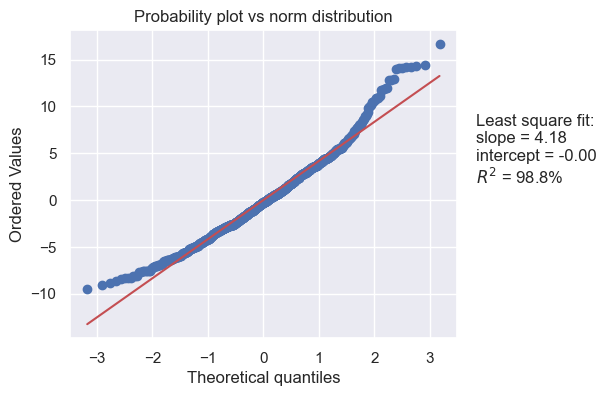

In [75]:
probplot_residuals(selected_mod.resid)

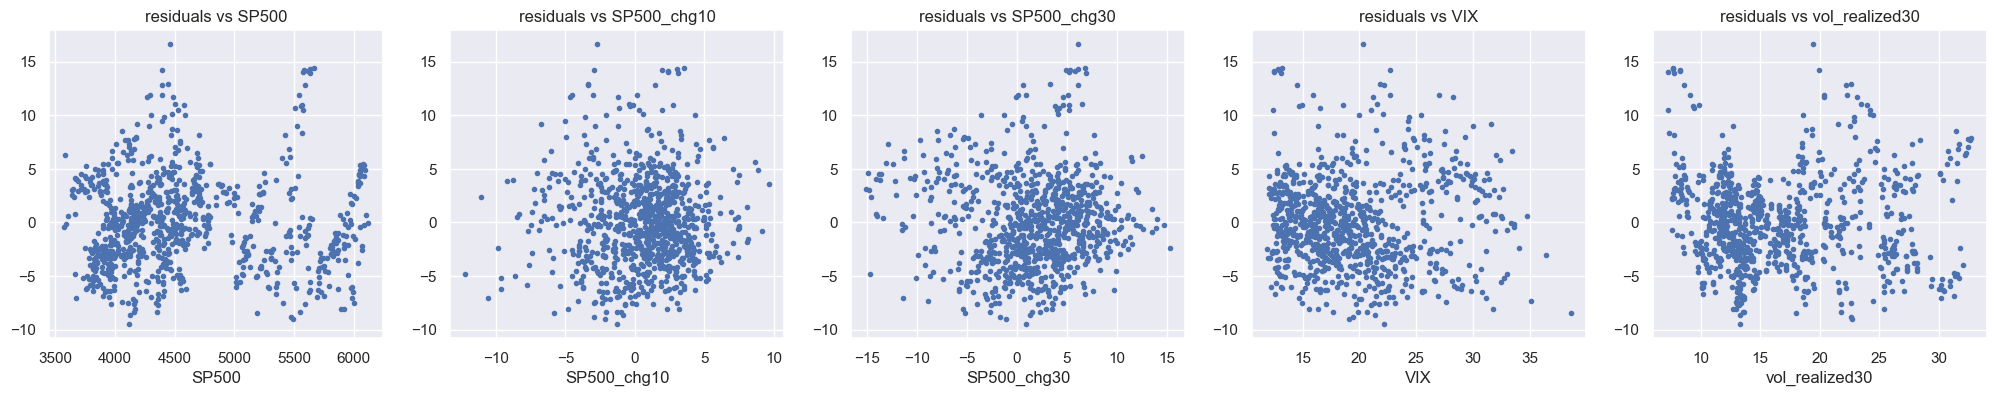

In [76]:
plot_residuals_vs_exogenous(data[exog_names], selected_mod.resid)

#### Test the predictions in-sample

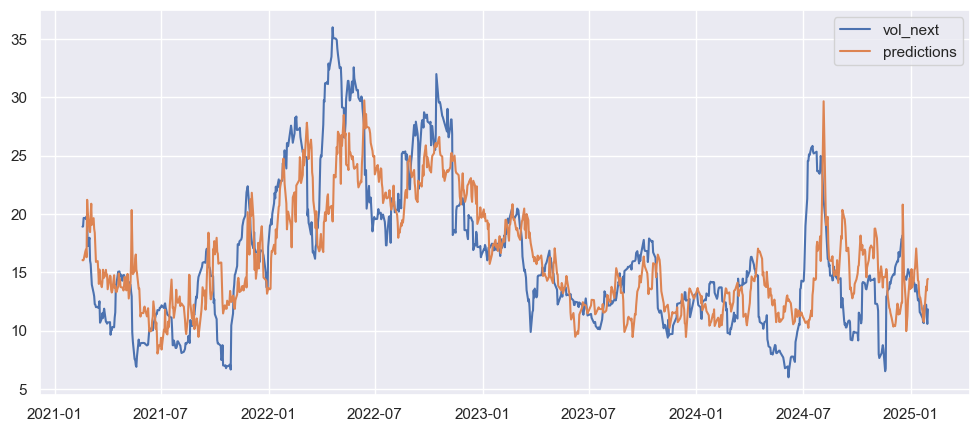

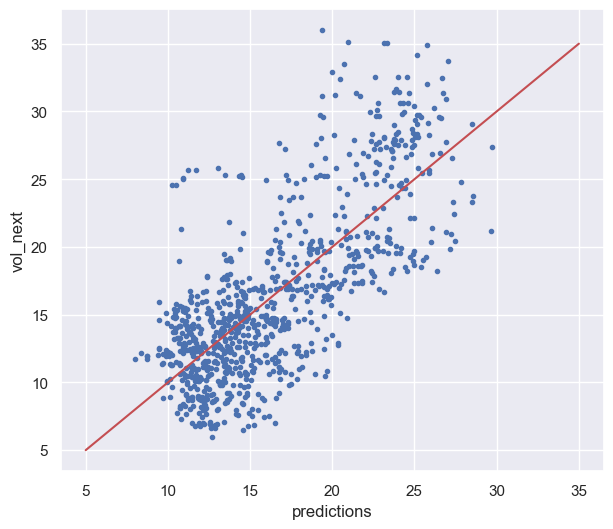

In [54]:
def plot_model_predictions(data, model):
    fig, ax = plt.subplots(figsize=(12,5))
    ax.plot(data[endog_name], label=endog_name)
    ax.plot(data.index, model.predict(), label="predictions")
    ax.legend()

    fig, ax = plt.subplots(figsize=(7,6))
    ax.scatter(model.predict(), data[endog_name], marker='.')
    ax.plot([5,35], [5,35], 'r')
    ax.set_ylabel(*endog_name)
    ax.set_xlabel("predictions")

plot_model_predictions(data, selected_mod)